## This notebook includes 4 strategies used for data cleaning as follow:  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import sklearn
from sklearn.model_selection import train_test_split
from IPython.display import display
#import vaex

#### Changed working directory path to where my data is saved. 

In [4]:
months = ['jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov1','nov15','nov19','dec']
la = 'la_'
names = {}
for i in months: 
    names[la +i] = pd.read_csv("listings_" + i +".csv")
   


    

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Given that the objective of this project is predicting listing price using various machin learning models instead of predicting booked rate, I put calendar dataset aside for now and may come back to study it later. 

In [277]:
#cal = 'cal_'
#calendars = {}
#for i in months:
    #calendars[cal+i] = pd.read_csv("calendar_" + i +".csv")

In [286]:
#for i in calendars:
    #print(i)

In [273]:
#weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
#for i in calendars:
    #calendars[i]['date'] = pd.to_datetime(calendars[i]['date'])
    #calendars[i]['weekday'] = calendars[i]['date'].apply(lambda x : x.weekday())
    #calendars[i]['weekdays'] = calendars[i]['weekday'].apply(lambda x : weekDays[x])
    

In [278]:
#calendars['cal_jan']['date'].dtype

### Concatenate 12 calendar tables to one final table named calendar_df

In [279]:
#calendars.keys()

In [281]:
#cal_list = list(calendars.keys())
#cal_list

In [254]:
#calendar_df = calendars['cal_jan']
#for i in cal_list[1:]:
 #   calendar_df = pd.concat([calendar_df, calendars[i]], axis = 0)
    
    


In [282]:
#calendar_df['listing_id'].value_counts().shape

In [283]:
#calendar_df.shape

#### Checking missing values of calendar dataframe

In [ ]:
#calendar_df.isnull().sum()

In [284]:
#airbnb_nomissing['id'].value_counts().shape

### 1. Concatenate 12 listings tabels into one final table named airbnb_df

In [5]:
keys_list = list(names.keys())
airbnb_df = names['la_jan']
for i in keys_list[1:]:
    airbnb_df = pd.concat([airbnb_df, names[i]], axis = 0)




### The final dataset consisting of listing data for 12 months of 2019 is assigned to airbnb_df.
### This dataset has 540298 observations and 106 columns.

In [6]:
airbnb_df.shape

(540298, 106)

###  Subset dataset only contains state of "CA, Ca, ca"

In [7]:
airbnb_df['state'].value_counts()

CA                                    516381
Auvergne-Rhône-Alpes                   15256
Rhône-Alpes                             3749
Auvergne Rhône-Alpes                    1618
Rhone-Alpes                             1523
Ca                                       464
Rhône                                    212
RA                                       146
ca                                        88
69                                        78
加州                                        30
NY                                        25
Auvergne-Rh                               15
Rhône Alpes                               12
加洲                                        12
California                                 8
France                                     8
Rhone                                      8
Rhônes-Alpes                               8
NV                                         7
IL                                         6
-                                          6
TN        

In [8]:
airbnb_ca = airbnb_df[airbnb_df['state'].isin(['CA','Ca','ca'])]

In [9]:
print("The dataset before subsetting has %s" %airbnb_df.shape[0] + ' rows.')
print("The dateser after subsetting has %s" %airbnb_ca.shape[0] + ' rows.')

The dataset before subsetting has 540298 rows.
The dateser after subsetting has 516933 rows.


In [ ]:
# some of these features might be having missing values, and some of them might be not releveant to 
#train machine learning model. Therefore, datacleaning is very necessary to prepare the data. 

#The strategy used for cleaning the data is as follows:
#1. Drop columns that are not relevant to our objective. For example: Experiences_offer, URL
#2. Find missing values for each column after being cleaned from step1. 
#3. Question here. what if some columns have so many missing values? which is more than 30% of the entire data?
#4. Covert columns to their correct data type. 
#5. 

### Drop Irrelevant Columns 

In [10]:
#check how data types are distributed. 
airbnb_ca.dtypes.value_counts()

object     63
float64    22
int64      21
dtype: int64

In [11]:
airbnb_df.select_dtypes(include = ['object']).columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'picture_url',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',


In [12]:
drop_object_list = ['listing_url','last_scraped','name','summary','description','experiences_offered','picture_url',
                  'host_url','host_name', 'host_since', 'host_location', 'host_about',
                  'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
                  'street', 'neighbourhood','city', 'state','neighbourhood_group_cleansed','market','smart_location', 
                   'country_code', 'country','calendar_updated','calendar_last_scraped', 
                   'first_review', 'last_review',"jurisdiction_names",'is_business_travel_ready',
                   'interaction','access','transit','house_rules','cancellation_policy',
                  'host_has_profile_pic','host_verifications','require_guest_profile_picture', 
                    'require_guest_phone_verification','bed_type','security_deposit','requires_license',
                    'host_has_profile_pic',"host_identity_verified", 'neighbourhood_cleansed'
                   ]

### Drop irrelevant float64 types

In [13]:
airbnb_ca.select_dtypes(include=["float64"]).columns

Index(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'beds', 'square_feet',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [14]:
drop_float_list = ['thumbnail_url', 'medium_url', 'xl_picture_url',
                  'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',]

### Drop irrelevant int64 types

In [136]:
#does availability_30 and etc mean how many days the listing would be available 
#within a year?

# calculated_host_listings_count. Do we need to keep this column? one-hot encoding is ready. 

In [15]:
airbnb_ca.select_dtypes(include=["int64"]).columns

Index(['id', 'scrape_id', 'host_id', 'accommodates', 'guests_included',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [16]:
drop_int_list = ['scrape_id','minimum_minimum_nights','maximum_minimum_nights', 
                 'minimum_maximum_nights','maximum_maximum_nights','calculated_host_listings_count']


In [290]:
#airbnb_ca[['calculated_host_listings_count','calculated_host_listings_count_entire_homes',
           #'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']].head()

In [17]:
#combine all of the columns which are supposed to be dropped. 
drop_columns = drop_object_list + drop_float_list + drop_int_list
print(drop_columns)

['listing_url', 'last_scraped', 'name', 'summary', 'description', 'experiences_offered', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'street', 'neighbourhood', 'city', 'state', 'neighbourhood_group_cleansed', 'market', 'smart_location', 'country_code', 'country', 'calendar_updated', 'calendar_last_scraped', 'first_review', 'last_review', 'jurisdiction_names', 'is_business_travel_ready', 'interaction', 'access', 'transit', 'house_rules', 'cancellation_policy', 'host_has_profile_pic', 'host_verifications', 'require_guest_profile_picture', 'require_guest_phone_verification', 'bed_type', 'security_deposit', 'requires_license', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'thumbnail_url', 'medium_url', 'xl_picture_url', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'scrape_id', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_night

In [18]:
print("Dropping %s columns" %len(drop_columns))
airbnb_ca_cleaned = airbnb_ca.drop(columns = drop_columns)
print("Shape fo the dataset after dropping : " , airbnb_ca_cleaned.shape)

Dropping 56 columns
Shape fo the dataset after dropping :  (516933, 51)


## missing value percentage for each column statistics

In [19]:
missing_stats = airbnb_ca_cleaned.isnull().sum().to_frame()

In [21]:
missing_stats.columns=["missing_num"]

In [22]:
missing_stats["missing_pctg"] = round(100* missing_stats["missing_num"] / airbnb_ca_cleaned.shape[0])

In [23]:
missing_stats.sort_values(by = "missing_num", ascending  =False, inplace = True)

In [24]:
display(missing_stats)

,missing_num,missing_pctg
host_acceptance_rate,516933,100.0
square_feet,512973,99.0
license,472504,91.0
monthly_price,463702,90.0
weekly_price,459095,89.0
notes,257156,50.0
neighborhood_overview,176598,34.0
space,134558,26.0
host_response_time,111257,22.0
host_response_rate,111257,22.0


In [25]:
drop_missing_values = list(missing_stats[missing_stats['missing_pctg'] >= 19].index)
print(drop_missing_values)

['host_acceptance_rate', 'square_feet', 'license', 'monthly_price', 'weekly_price', 'notes', 'neighborhood_overview', 'space', 'host_response_time', 'host_response_rate', 'review_scores_value', 'review_scores_location', 'review_scores_checkin', 'review_scores_communication', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_rating', 'reviews_per_month']


In [26]:
airbnb_partial_cleaned = airbnb_ca_cleaned.drop(columns= drop_missing_values)

In [27]:
airbnb_partial_cleaned.shape

(516933, 33)

### Convert data type  
1.some columns with object type should be changed to categorical type so as to run one-hot encoding when training the model

In [28]:
airbnb_partial_cleaned.columns

Index(['id', 'host_id', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'zipcode', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'instant_bookable',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [29]:
# which columns should be changed to categorical?

airbnb_partial_cleaned.select_dtypes(include = "object").head()

,host_is_superhost,zipcode,is_location_exact,property_type,room_type,amenities,price,cleaning_fee,extra_people,has_availability,instant_bookable
0,f,90230,t,Condominium,Entire home/apt,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$122.00,$240.00,$25.00,t,f
1,f,91505,t,House,Entire home/apt,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$168.00,$100.00,$0.00,t,t
2,t,90046,t,Apartment,Private room,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$85.00,$0.00,t,t
3,f,90405,t,Apartment,Private room,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",$140.00,$100.00,$0.00,t,f
4,f,90706,t,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,$75.00,$25.00,t,f


In [176]:
airbnb_partial_cleaned.select_dtypes(include = 'object').columns

Index(['host_is_superhost', 'zipcode', 'is_location_exact', 'property_type',
       'room_type', 'amenities', 'price', 'cleaning_fee', 'extra_people',
       'has_availability', 'instant_bookable'],
      dtype='object')

In [30]:
categorical_cols = ['zipcode','host_is_superhost',"is_location_exact", 'property_type','room_type', 'has_availability','instant_bookable'                 
]

In [31]:
airbnb_partial_cleaned[categorical_cols].dtypes

zipcode              object
host_is_superhost    object
is_location_exact    object
property_type        object
room_type            object
has_availability     object
instant_bookable     object
dtype: object

In [32]:
airbnb_partial_cleaned[categorical_cols] = airbnb_partial_cleaned[categorical_cols].apply(lambda x : x.astype('category'),
                                                                         axis = 'rows')

In [33]:
airbnb_partial_cleaned[categorical_cols].dtypes

zipcode              category
host_is_superhost    category
is_location_exact    category
property_type        category
room_type            category
has_availability     category
instant_bookable     category
dtype: object

## 2. Filter data

### 1.Find out how many unqiue values each of these columns have.

In [34]:
num_unique_values  = airbnb_partial_cleaned[categorical_cols].apply(pd.Series.nunique, axis = 'rows')
num_unique_values

zipcode              642
host_is_superhost      2
is_location_exact      2
property_type         47
room_type              4
has_availability       1
instant_bookable       2
dtype: int64

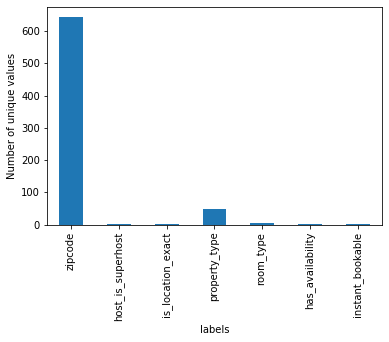

In [35]:
num_unique_values.plot(kind = 'bar')
plt.xlabel('labels')
plt.ylabel('Number of unique values')
plt.show()

In [162]:
#airbnb_partial_cleaned.to_csv("partial_cleaned_listings_without_subsetting.csv", index = False)


In [59]:
airbnb_partial_cleaned.property_type.value_counts()

Apartment                 188548
House                     177278
Condominium                29680
Guesthouse                 27092
Guest suite                17675
Townhouse                  16200
Bungalow                   14360
Villa                      11818
Loft                       11240
Serviced apartment          3619
Hostel                      3476
Cottage                     2261
Bed and breakfast           2165
Camper/RV                   2035
Boutique hotel              2029
Other                       1646
Tiny house                   972
Cabin                        925
Aparthotel                   858
Hotel                        625
Farm stay                    364
Tent                         277
Boat                         254
Castle                       196
Earth house                  183
Chalet                       165
Treehouse                    151
Dome house                   122
Yurt                         117
Barn                          94
Campsite  

### The most 4 common property type is selected to be included in the dataset 

In [36]:
airbnb_subset = airbnb_partial_cleaned[airbnb_partial_cleaned.property_type
                                       .isin(['Apartment',"House",'Condominium','Guesthouse'])]

In [37]:
airbnb_subset.shape

(422598, 33)

### 2. Drop those unused categories of property types.

In [38]:
airbnb_subset.loc[:,"property_type"] = airbnb_subset.loc[:,"property_type"].cat.remove_unused_categories()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [39]:
airbnb_subset['property_type'].value_counts()

Apartment      188548
House          177278
Condominium     29680
Guesthouse      27092
Name: property_type, dtype: int64

### 3. Convert amenities to the number of elements included in amenities for each observation. 



In [40]:
airbnb_subset['amenities'] = airbnb_subset['amenities'].apply(lambda x : len(x.split(",")))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 4. Missing Values Statistics for the subset

In [41]:
subset_missing = airbnb_subset.isnull().sum().to_frame()
subset_missing.columns = ["missing_values"]
subset_missing['percentage'] =(100 * subset_missing['missing_values'] / airbnb_subset.shape[0])

In [42]:
subset_missing

,missing_values,percentage
id,0,0.000000
host_id,0,0.000000
host_is_superhost,489,0.115713
host_listings_count,489,0.115713
host_total_listings_count,489,0.115713
zipcode,5332,1.261719
latitude,0,0.000000
longitude,0,0.000000
is_location_exact,0,0.000000
property_type,0,0.000000


### Check if columns contain host are having missing values for same observations. 

In [43]:
cols_missing_values = list(subset_missing[subset_missing.missing_values > 0].index)
airbnb_subset_missing_values = airbnb_subset[cols_missing_values]

In [173]:
host_cols = list(airbnb_subset_missing_values.columns[airbnb_subset_missing_values.columns.str.contains('host')])

In [174]:
host_cols

['host_is_superhost', 'host_listings_count', 'host_total_listings_count']

In [175]:
airbnb_subset_missing_values[host_cols][airbnb_subset_missing_values.host_is_superhost.isnull()].shape

(523, 3)

#### The result above proves that those three host_cols have same missing values for the same observations. 

##  Delete all of those missing values and to see how many observations left.

In [44]:
airbnb_nomissing = airbnb_subset.dropna()

In [45]:
airbnb_nomissing.columns

Index(['id', 'host_id', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'zipcode', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'instant_bookable',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [46]:
print("After dropping all of missing values for each column, the dataset named airbnb_nomissing \n has %s" % airbnb_nomissing.shape[0] 
      + " rows."
     )

After dropping all of missing values for each column, the dataset named airbnb_nomissing 
 has 359363 rows.


## 3. One hot encoding categorical variables. 

#### Keep latitude and longitude colunns for creating visualizations. So assign a new dataset without latitude and longitude to airbnb_training.

In [47]:
airbnb_training = airbnb_nomissing.drop(['latitude','longitude'], axis = 'columns')

In [48]:
airbnb_training.columns

Index(['id', 'host_id', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'zipcode', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'instant_bookable', 'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [297]:
if "latitude" in airbnb_training.columns:
    print('yes')
else:
    print('no')

no


In [49]:
categorical_cols

['zipcode',
 'host_is_superhost',
 'is_location_exact',
 'property_type',
 'room_type',
 'has_availability',
 'instant_bookable']

In [50]:
category_one_hot = pd.get_dummies(airbnb_training[categorical_cols])

In [51]:
category_one_hot.shape

(359363, 657)

### Converting price from object type with dollar sign to float type with dolloar sign removed

In [52]:
airbnb_training = airbnb_training.drop(categorical_cols, axis = 1)

In [54]:
airbnb_training.columns

Index(['id', 'host_id', 'host_listings_count', 'host_total_listings_count',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [55]:
airbnb_training.price = airbnb_training.price.apply(lambda x : x.strip('$'))
airbnb_training.price = airbnb_training.price.apply(lambda x : x.replace(',',''))
airbnb_training.price = airbnb_training.price.astype(str).astype(float)


In [56]:
airbnb_training.cleaning_fee = airbnb_training.cleaning_fee.apply(lambda x : x.strip('$'))
airbnb_training.cleaning_fee = airbnb_training.cleaning_fee.apply(lambda x : x.replace(',',''))
airbnb_training.cleaning_fee = airbnb_training.cleaning_fee.astype(str).astype(float) 

In [57]:
airbnb_training.extra_people = airbnb_training.extra_people.apply(lambda x : x.strip('$'))
airbnb_training.extra_people = airbnb_training.extra_people.apply(lambda x : x.replace(',',''))
airbnb_training.extra_people = airbnb_training.extra_people.astype(str).astype(float) 

In [58]:
# Concatenate two tables together. 
airbnb_with_dummies = pd.concat([category_one_hot, airbnb_training], axis = 'columns')

## 4.Split the dataset to testing and training using train_test_split function from sklearn. 
#### 1. The shape of dataset airbnb_with_dummies splitted into testing and training is (422027, 684).

In [67]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn import metrics

In [61]:
airbnb_dl = airbnb_with_dummies.drop('price', axis = 1)
target = airbnb_with_dummies.price

In [62]:
x_train,x_test, y_train,y_test= train_test_split(airbnb_dl, target, test_size = 0.2, random_state = 42)

In [64]:
from keras.layers import Dropout

In [65]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
x_train = s_scaler.fit_transform(x_train.astype(np.float))
x_test = s_scaler.transform(x_test.astype(np.float))

## Deep learning Model

In [66]:
n_col = airbnb_with_dummies.shape[1]-1

model = Sequential()

model.add(Dense(681, activation = 'relu', input_shape = (n_col,)))
model.add(Dense(681, activation = 'relu'))
model.add(Dense(681, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss= 'mean_squared_error')
model.fit(x_train, y_train)

8985/8985 [==============================] - 48s 5ms/step - loss: 65323.0234


MAE: 65.55588106511439
MSE: 55060.2180596508
RMSE: 234.64913820351182
VarScore: 0.5914149178661308


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


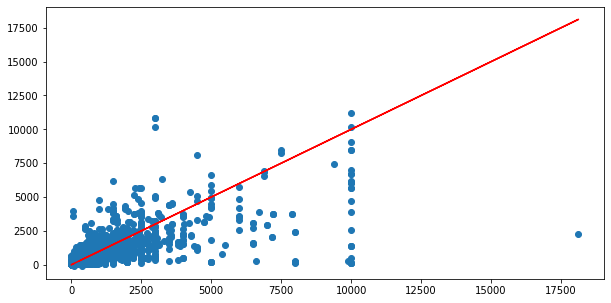

In [68]:
y_pred =model.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

## Linear Regression Model

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [70]:
x_train1,x_test1, y_train1,y_test1= train_test_split(airbnb_dl, target, test_size = 0.2, random_state = 42)

In [71]:
# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(x_train1, y_train1)
 
# Predict on the test data: y_pred
y_pred = reg_all.predict(x_test1)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(x_test1, y_test1)))
rmse = np.sqrt(mean_squared_error(y_test1, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.4348543876340384
Root Mean Squared Error: 275.9150165163795


## Lasso Regulazation Model

In [264]:
 from sklearn.linear_model import LassoCV

In [267]:
x_train2,x_test2, y_train2,y_test2= train_test_split(airbnb_dl, target, test_size = 0.2, random_state = 42)

In [ ]:
y_

In [269]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
x_train2 = s_scaler.fit_transform(x_train2.astype(np.float))
x_test2 = s_scaler.transform(x_test2.astype(np.float))
y_train2 = s_scaler.transform(y_train2.astype(np.float))
y_test2 = s_scaler.transform(y_test2.astype(np.float))

ValueError: Expected 2D array, got 1D array instead:
array=[590. 100.  75. ... 225.  85.  80.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [265]:
reg = LassoCV(cv=10, random_state=0).fit(x_train1, y_train1)
lasso_prediction = reg.predict(x_test1)
lasso_rmse = np.sqrt(mean_squared_error(y_test1, lasso_prediction))

In [266]:
lasso_rmse

366.78851230883635